In [1]:
import pandas as pd
import numpy as np
import datetime
from getting_started import *
import detect_duplicates_script as script_dd
import get_final_dataset as script_fds
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_final = script_fds.get_final_ds(df_patient, df_pcr)
#
df_final[:3]
#df_patient[df_patient['date_of_birth'].isnull()]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
15,378167,cain,scarles,58.0,reader court,dorrigo,2428,qld,NaN,31.0,03 67476384,jorobe
17,429365,None,coffey,1409.0,musson close,beaconsfield upper,5019,wa,NaN,30.0,03 13369308,silverweir
22,427069,mystique,white,85.0,herington street,east maitland,6000,qld,NaN,21.0,07 24234495,None
29,284779,alexandra,miles,23.0,duffy street,christies beach,2047,nsw,NaN,29.0,02 24131074,riverland village
34,600186,zachary,stancliffe,40.0,macgregor street,coodanup,6027,nsw,NaN,29.0,03 67952046,woodsong
...,...,...,...,...,...,...,...,...,...,...,...,...
19968,902251,caleb,richmond,4.0,philp place,elimbah,4873,vic,NaN,NaN,03 73275720,None
19975,752160,ashleigh,None,30.0,winser crescent,buff point,4806,wa,NaN,36.0,04 10236954,glennhill
19984,134889,xavier,priest,28.0,needham place,reynella,3318,nsw,NaN,NaN,02 74580410,None
19994,912344,fraser,mcneill,10.0,collie street,booragul,2075,qld,NaN,31.0,02 77020191,None


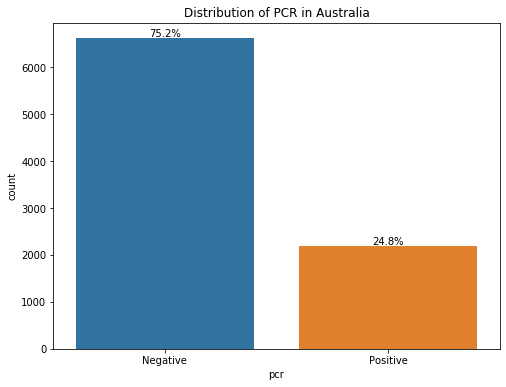

In [3]:
plt.figure(figsize=(8,6))

plt.title('Distribution of PCR in Australia')
plt.xlabel('pcr')
plt.ylabel('Count')

df_final_pcr = df_final[['pcr']]
ncount = len(df_final_pcr)
labels = ['Negative', 'Positive']
ax = sns.countplot(x="pcr", data=df_final_pcr)
ax.set_xticklabels(labels, rotation='horizontal', fontsize=10)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
######################################################################
### Commentaire: 

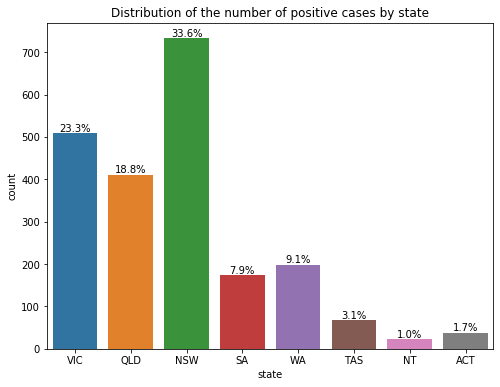

In [4]:
plt.figure(figsize=(8,6))

plt.title('Distribution of the number of positive cases by state')
plt.xlabel('pcr')
plt.ylabel('Count')

df_positive_state = df_final[['state']][df_final['pcr'] == 1]
ncount = len(df_positive_state)

ax = sns.countplot(x="state", data=df_positive_state)
#ax.set_xticklabels(labels, rotation='horizontal', fontsize=10)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [5]:
#plt.figure(figsize=(12,8))

#plt.title('Distribution of PCR in Australia s states')
#plt.xlabel('pcr')
#plt.ylabel('Count')

#df_count_state_pcr = df_final[['state', 'pcr']]
#df_count_state_pcr['pcr'].replace(to_replace =0, 
                          #        value ="Negative",
                           #      inplace=True) 
#df_count_state_pcr['pcr'].replace(to_replace = 1, 
                              #    value ="Positive",
                               #  inplace=True) 

#ax = sns.countplot(x="state", hue="pcr", data=df_count_state_pcr)
#total = len(df_count_state_pcr)
#for p in ax.patches:
#    percentage = f'{100 * p.get_height() / total:.1f}%\n'
#    x = p.get_x() + p.get_width() / 2
#    y = p.get_height()
#    ax.annotate(percentage, (x, y), ha='center', va='center')

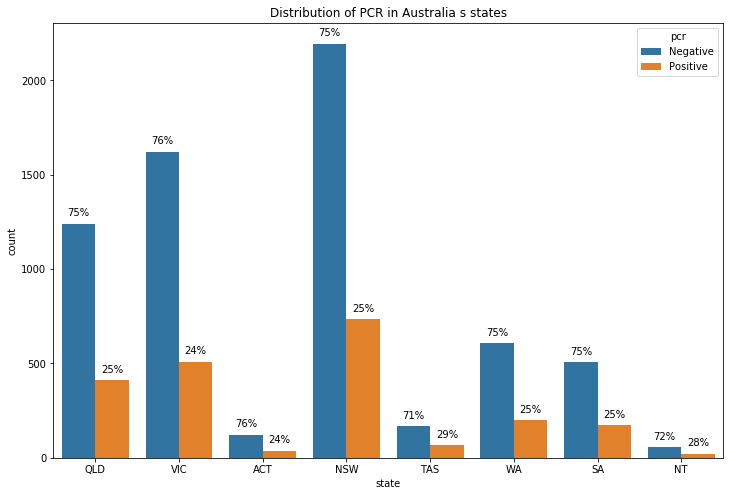

In [6]:
plt.figure(figsize=(12,8))

plt.title('Distribution of PCR in Australia s states')
plt.xlabel('pcr')
plt.ylabel('Count')

df_state_pcr = df_final[['state', 'pcr']]
df_count_state_pcr = df_state_pcr.copy()
df_count_state_pcr['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_count_state_pcr['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.countplot(x="state", hue="pcr", data=df_count_state_pcr)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

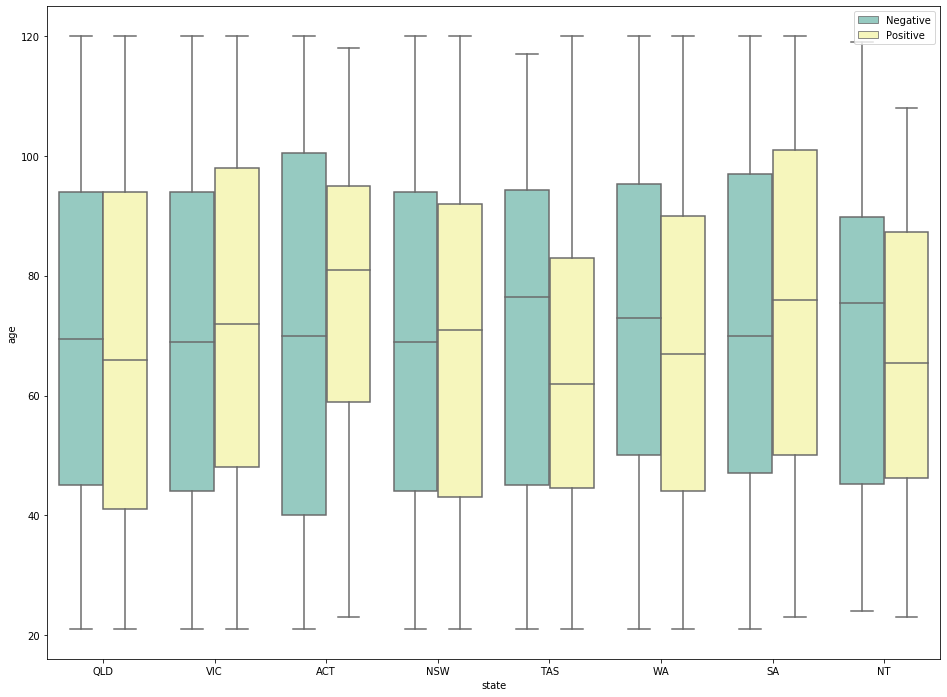

In [22]:
plt.figure(figsize=(16,12))

df_age_state = df_final[['age', 'state', 'pcr']]
df_age_state_box = df_age_state.copy()
df_age_state_box['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_age_state_box['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.boxplot(x="state", y="age", hue="pcr",
                 data=df_age_state_box, palette="Set3")

plt.legend(loc='upper right')

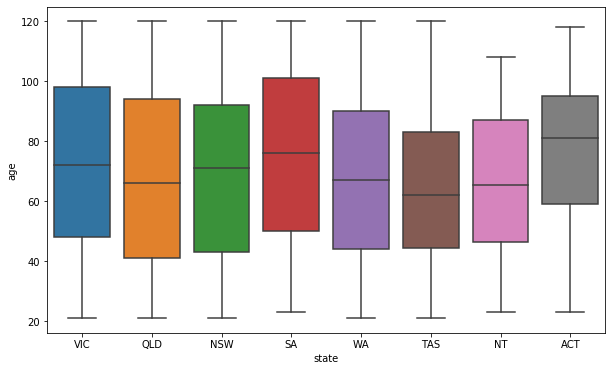

In [20]:
#plt.figure(figsize=(12,8))

#plt.title('Distribution of PCR in Australia s states')
#plt.xlabel('pcr')
#plt.ylabel('Count')
plt.figure(figsize=(10,6))

df_pos_age_state = df_final[['age', 'state']][df_final['pcr'] == 1]
ax = sns.boxplot(x="state", y="age", data=df_pos_age_state)

In [8]:
#df_final_pcr = df_final[['pcr']]

#labels = ['Negative', 'Positive'];
#graph = sns.catplot(x="pcr", 
 #           kind="count",
            #palette="ch:.25", 
 #           data=df_final_pcr)
#graph.set_axis_labels("PCR", "Count")
#graph.set_xticklabels(labels, rotation='horizontal', fontsize=10)

#graph
# Ajouter pourcentage !
#df_final_pcr[:10]

In [9]:
#df_final_state = df_final[['state']][df_final['pcr'] == 1]

#labels = ['Negative', 'Positive'];
#graph = sns.catplot(x="state", 
 #           kind="count",
  #          #palette="ch:.25", 
   #         data=df_final_state)
#graph.set_axis_labels("state", "Count of contamination by state")
#graph.set_xticklabels(labels, rotation='horizontal', fontsize=10)
#graph